In [2]:
import matplotlib.pyplot as plt

In [3]:
from pathlib import Path
pattern = "slow"
date = "24-09"
data = Path(f"./{pattern}-results-{date}/")
out_dir = Path(f"./{pattern}-{date}-charts/")
out_dir.mkdir(exist_ok=True)
list(data.iterdir())

[PosixPath('slow-results-24-09/20221004-1541'),
 PosixPath('slow-results-24-09/20220923-0323'),
 PosixPath('slow-results-24-09/20220922-0058'),
 PosixPath('slow-results-24-09/20220925-2331'),
 PosixPath('slow-results-24-09/20220925-0805'),
 PosixPath('slow-results-24-09/20220926-1502'),
 PosixPath('slow-results-24-09/20220923-1921')]

In [4]:
import json
from collections import defaultdict

experiment_csvs = defaultdict(list)

for experiment in data.iterdir():
    if experiment.name.startswith("."): continue

    settings_path = experiment / "settings.json"
    settings = json.loads(settings_path.read_text())
    
    key = (settings["workers"], settings["stale"])
    experiment_csvs[key].extend([file for file in experiment.iterdir() if file.name.endswith(".csv")])

In [5]:
experiment_csvs

defaultdict(list,
            {(4,
              2): [PosixPath('slow-results-24-09/20221004-1541/worker-0-stats.csv'), PosixPath('slow-results-24-09/20221004-1541/worker-1-stats.csv'), PosixPath('slow-results-24-09/20221004-1541/worker-3-stats.csv'), PosixPath('slow-results-24-09/20221004-1541/worker-2-stats.csv')],
             (4,
              10): [PosixPath('slow-results-24-09/20220923-0323/worker-0-stats.csv'), PosixPath('slow-results-24-09/20220923-0323/worker-1-stats.csv'), PosixPath('slow-results-24-09/20220923-0323/worker-3-stats.csv'), PosixPath('slow-results-24-09/20220923-0323/worker-2-stats.csv')],
             (4,
              0): [PosixPath('slow-results-24-09/20220922-0058/worker-0-stats.csv'), PosixPath('slow-results-24-09/20220922-0058/worker-1-stats.csv'), PosixPath('slow-results-24-09/20220922-0058/worker-3-stats.csv'), PosixPath('slow-results-24-09/20220922-0058/worker-2-stats.csv')],
             (4,
              32): [PosixPath('slow-results-24-09/20220925-23

In [6]:
import pandas as pd
dfs = {}

for experiment, csvs in experiment_csvs.items():
    dfs[experiment] = [pd.read_csv(csv) for csv in csvs]

In [7]:
dfs

{(4,
  2): [       Unnamed: 0    train_loss  train_acc  val_loss  val_acc     time_refs
  0        0.000000           NaN        NaN  2.305257   0.0897  1.664898e+09
  1        1.000000      2.235035   0.277344  2.245080   0.2626  1.664899e+09
  2        2.000000      2.157354   0.523438  2.165210   0.4773  1.664899e+09
  3        3.000000      2.092101   0.593750  2.095496   0.5648  1.664900e+09
  4        4.000000      2.028716   0.574219  2.000686   0.6202  1.664900e+09
  ..            ...           ...        ...       ...      ...           ...
  108    108.000000      0.242216   0.937500  0.322913   0.9085  1.664958e+09
  109    109.000000      0.313395   0.925781  0.322513   0.9073  1.664959e+09
  110    110.000000      0.343488   0.898438  0.321206   0.9096  1.664959e+09
  111    111.000000      0.378422   0.878906  0.320932   0.9097  1.664960e+09
  112  61682.122406  39047.263098        NaN       NaN      NaN           NaN
  
  [113 rows x 6 columns],        Unnamed: 0    trai

In [8]:
ref = {}

for experiment, experiment_data in dfs.items():
    reference_worker = [worker for worker in experiment_data if worker.iloc[-2, -2] >= 0.91][0]
    ref[experiment] = reference_worker#.loc[:reference_worker["train_acc"].gt(0.91).idxmax(), :]

In [9]:
ref

{(4,
  2):        Unnamed: 0    train_loss  train_acc  val_loss  val_acc     time_refs
 0        0.000000           NaN        NaN  2.305257   0.0897  1.664898e+09
 1        1.000000      2.233554   0.273438  2.245203   0.2698  1.664899e+09
 2        2.000000      2.164668   0.480469  2.164655   0.4901  1.664899e+09
 3        3.000000      2.110389   0.539062  2.095749   0.5656  1.664900e+09
 4        4.000000      1.997941   0.613281  2.000426   0.6142  1.664900e+09
 ..            ...           ...        ...       ...      ...           ...
 108    108.000000      0.301572   0.925781  0.323418   0.9087  1.664958e+09
 109    109.000000      0.255360   0.925781  0.322446   0.9085  1.664959e+09
 110    110.000000      0.248992   0.929688  0.321589   0.9096  1.664959e+09
 111    111.000000      0.335692   0.902344  0.320817   0.9101  1.664960e+09
 112  61682.006554  38745.223982        NaN       NaN      NaN           NaN
 
 [113 rows x 6 columns],
 (4,
  10):        Unnamed: 0    train_

# Plotting Time Chart

In [10]:
ref_times = {experiment: data.iloc[-1,0] for experiment, data in ref.items()}
ref_times

{(4, 2): 61682.00655412674,
 (4, 10): 57346.6244866848,
 (4, 0): 95080.3899345398,
 (4, 32): 55815.76748275757,
 (4, 48): 55513.89518260956,
 (4, 16): 57132.38931059837,
 (4, 500): 52804.435685396194}

In [36]:
import matplotlib.pyplot as plt
import numpy as np

colors = [
    (158/255, 228/255, 147/255), # verde
    
    (136/255, 199/255, 243/255), # azul claro
    (232/255, 152/255, 152/255), # vermelho
    (178/255, 178/255, 178/255), # cinza
    (232/255, 194/255, 75/255), # amarelo 
    (99/255, 135/255, 174/255), # azul escuro
    (255/255, 158/255, 30/255) # laranja
]

VERDE = 0
AZUL_CLARO = 1
VERMELHO = 2
CINZA = 3
AMARELO = 4
AZUL_ESCURO = 5
LARANJA = 6

In [12]:
from matplotlib.pyplot import figure

def get_label(window):
    if window == 0:
        return "Sync."
    elif window >= 500:
        return "Async."
    else:
        return f"W={window}"

def plot_time(data, yname, filename):
    figure(figsize=(4, 2.5), dpi=80)
    labels = []

    for idx, (exp, time) in enumerate(sorted(data.items())):
        print(exp)
        label = get_label(exp[1])
        labels.append(label)
        plt.bar(
            idx, 
            time,
            color=colors[AZUL_CLARO],
            edgecolor="black",
            width=.75,
            label=label,
            zorder=2,
        )

    #plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                    #mode="expand", borderaxespad=0, ncol=3, fontsize=16)
    plt.grid(zorder=-1)
    plt.xticks(range(len(labels)), labels, fontsize=16, rotation=45, ha="right")
    plt.yticks(fontsize=16)
    plt.ylabel(yname, fontsize=16)
    plt.savefig(out_dir / filename, bbox_inches="tight")
    plt.show()

95080.3899345398
{(4, 2): 64.87353133132193, (4, 10): 60.31382972468493, (4, 0): 100.0, (4, 32): 58.70376375316211, (4, 48): 58.386272101775496, (4, 16): 60.08850968105246, (4, 500): 55.53662087602983}
(4, 0)
(4, 2)
(4, 10)
(4, 16)
(4, 32)
(4, 48)
(4, 500)


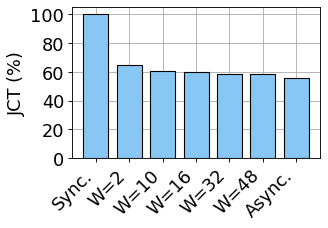

In [13]:
max_time = max(ref_times.values())
print(max_time)
normalized = {exp: time/max_time * 100 for exp, time in ref_times.items()}
print(normalized)
plot_time(normalized, "JCT (%)", "completion_time.pdf")


{(4, 2): 55.56937527398805, (4, 10): 52.61158209787596, (4, 0): 71.48901498837579, (4, 32): 51.68126618773849, (4, 48): 51.40175479871255, (4, 16): 52.90036047277627, (4, 500): 50.773495851342496}
(4, 0)
(4, 2)
(4, 10)
(4, 16)
(4, 32)
(4, 48)
(4, 500)


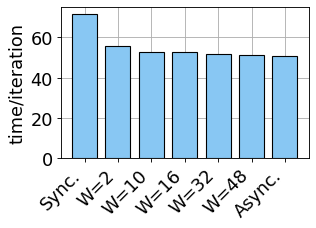

In [14]:
time_per_iteration = {exp: time / ((len(ref[exp].index) - 2) * 10) for exp, time in ref_times.items()}
print(time_per_iteration)
plot_time(time_per_iteration, "time/iteration", "average_time.pdf")

In [15]:
wait_times = {experiment: data.iloc[-1,1] for experiment, data in ref.items()}
wait_times

{(4, 2): 38745.22398161888,
 (4, 10): 34614.42370700836,
 (4, 0): 66951.84495973587,
 (4, 32): 33161.17557120323,
 (4, 48): 33382.95794892311,
 (4, 16): 34561.99371385574,
 (4, 500): 32079.161390781403}

{(4, 2): 57.87028573285747, (4, 10): 51.70047775057597, (4, 0): 100.0, (4, 32): 49.52989061189577, (4, 48): 49.861147170775155, (4, 16): 51.62216774555049, (4, 500): 47.91378252544567}
(4, 0)
(4, 2)
(4, 10)
(4, 16)
(4, 32)
(4, 48)
(4, 500)


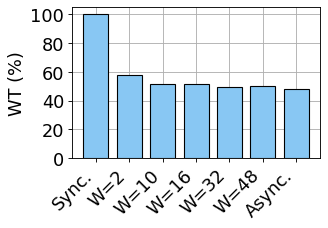

In [16]:
max_time = max(wait_times.values())
normalized = {exp: time * 100 / max_time for exp, time in wait_times.items()}
print(normalized)
plot_time(normalized, "WT (%)", "waiting_time.pdf")

In [17]:
waiting_time_per_iteration = {exp: wait_time / ((len(ref[exp].index) - 2) * 10) for exp, wait_time in wait_times.items()}
print(waiting_time_per_iteration)

{(4, 2): 34.90560719064764, (4, 10): 31.756352024778312, (4, 0): 50.33973305243298, (4, 32): 30.704792195558547, (4, 48): 30.91014624900288, (4, 16): 32.00184603134791, (4, 500): 30.845347491135964}


(4, 0)
(4, 2)
(4, 10)
(4, 16)
(4, 32)
(4, 48)
(4, 500)


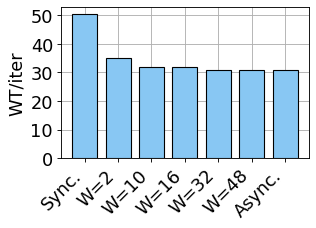

In [18]:
plot_time(waiting_time_per_iteration, "WT/iter", "average_waiting_time.pdf")

# Accuracy Graph

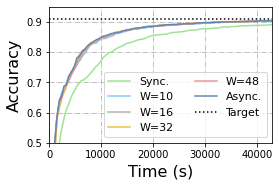

In [37]:
exp_accs = {}
last_ax = None
col = "val_acc"
plot_colors = [
    colors[VERDE],
    colors[LARANJA],
    colors[AZUL_CLARO],
    colors[CINZA],
    colors[AMARELO],
    colors[VERMELHO],
    colors[AZUL_ESCURO],
]


last_ax = None
for idx, (exp, worker_data) in enumerate(sorted(ref.items())):
    if exp[1] in {2}:
        continue
    first_time = worker_data["time_refs"][0]
    plot_cols = worker_data.loc[:,["time_refs", col]]
    plot_cols["time_refs"] = plot_cols["time_refs"].apply(lambda x: x - first_time)
    plot_cols = plot_cols.loc[2:plot_cols[col].lt(0.91).idxmin(),:]
    plot_cols.rename(columns={col: get_label(exp[1])}, inplace=True)
    
    last_ax = plot_cols.plot(ax=last_ax, 
                             x="time_refs", 
                             xlabel="Time", 
                             color=plot_colors[idx], 
                             figsize=(4, 2.5),zorder=2
                            )
plt.grid(linestyle="-.", zorder=-1)
plt.axhline(y=.91, color='black', linestyle=":", label="Target")
plt.ylabel("Accuracy", fontsize=16)
plt.xlabel("Time (s)", fontsize=16)
plt.ylim([.5,.95])
plt.xlim([0, 43000])
plt.legend(loc="lower right",ncol=2, fontsize=11)
plt.savefig(out_dir / f"accuracy.pdf", bbox_inches="tight")
plt.show()

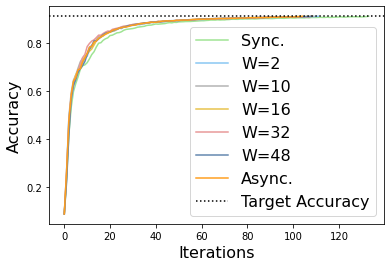

In [20]:
exp_accs = {}
last_ax = None
for idx, (exp, worker_data) in enumerate(sorted(ref.items())):
    plot_cols = worker_data.loc[:,[col]]
    plot_cols.rename(columns={col: get_label(exp[1])}, inplace=True)
    last_ax = plot_cols.plot(ax=last_ax,  
                             color=plot_colors[idx])
plt.axhline(y=.91, color='black', linestyle=":", label="Target Accuracy")
plt.legend(fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.xlabel("Iterations", fontsize=16)
plt.savefig(out_dir / "accuracy-iteration.pdf", bbox_inches="tight")
plt.show()

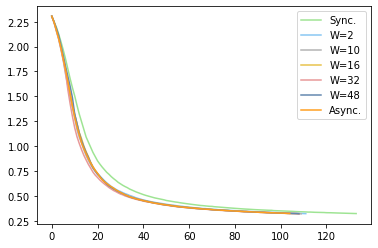

In [21]:
last_ax = None
for idx, (exp, worker_data) in enumerate(sorted(ref.items())):
    worker_data_clean = worker_data.drop(worker_data.tail(1).index)
    last_ax = worker_data_clean[["val_loss"]].rename(columns={"val_loss": get_label(exp[1])}).plot(ax=last_ax, color=plot_colors[idx])
plt.savefig(out_dir/"loss_iter.pdf", bbox_inches="tight")

# Loss Graph

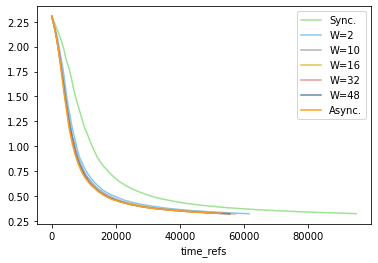

In [22]:
exp_accs = {}
last_ax = None
for idx, (exp, worker_data) in enumerate(sorted(ref.items())):
    first_time = worker_data["time_refs"][0]
    plot_cols = worker_data.loc[:,["time_refs", "val_loss"]]
    plot_cols["time_refs"] = plot_cols["time_refs"].apply(lambda x: x - first_time)
    plot_cols.rename(columns={"val_loss": get_label(exp[1])}, inplace=True)
    last_ax = plot_cols.plot(ax=last_ax, x="time_refs", color=plot_colors[idx])
plt.savefig(out_dir/"loss_time.pdf", bbox_inches="tight")

{(4, 2): 112, (4, 10): 110, (4, 0): 134, (4, 32): 109, (4, 48): 109, (4, 16): 109, (4, 500): 105}
(4, 0)
(4, 2)
(4, 10)
(4, 16)
(4, 32)
(4, 48)
(4, 500)


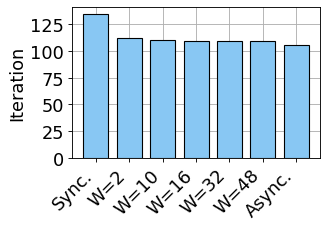

In [23]:
d = {exp: worker["Unnamed: 0"].idxmax() for exp, worker in ref.items()}
print(d)
plot_time(d, "Iteration", "iters.pdf")